In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

In [247]:
df = pd.read_csv('train.csv')
df.drop('id', axis=1, inplace=True)
df

,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031
...,...,...,...,...,...,...,...,...,...,...,...
749995,Learning Lab,Episode 25,75.66,Education,69.36,Saturday,Morning,NaN,0.0,Negative,56.87058
749996,Business Briefs,Episode 21,75.75,Business,35.21,Saturday,Night,NaN,2.0,Neutral,45.46242
749997,Lifestyle Lounge,Episode 51,30.98,Lifestyle,78.58,Thursday,Morning,84.89,0.0,Negative,15.26000
749998,Style Guide,Episode 47,108.98,Lifestyle,45.39,Thursday,Morning,93.27,0.0,Negative,100.72939


In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Podcast_Name                 750000 non-null  object 
 1   Episode_Title                750000 non-null  object 
 2   Episode_Length_minutes       662907 non-null  float64
 3   Genre                        750000 non-null  object 
 4   Host_Popularity_percentage   750000 non-null  float64
 5   Publication_Day              750000 non-null  object 
 6   Publication_Time             750000 non-null  object 
 7   Guest_Popularity_percentage  603970 non-null  float64
 8   Number_of_Ads                749999 non-null  float64
 9   Episode_Sentiment            750000 non-null  object 
 10  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), object(6)
memory usage: 62.9+ MB


In [249]:
df['Number_of_Ads'].fillna(df['Number_of_Ads'].mean(), inplace=True)
df['Episode_Length_minutes'].fillna(df['Episode_Length_minutes'].mean(), inplace=True)
df['Guest_Popularity_percentage'].fillna(df['Guest_Popularity_percentage'].mean(), inplace=True)



C:\Users\HAROON TADERS\AppData\Local\Temp\ipykernel_16368\1785926854.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Number_of_Ads'].fillna(df['Number_of_Ads'].mean(), inplace=True)
C:\Users\HAROON TADERS\AppData\Local\Temp\ipykernel_16368\1785926854.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [250]:
df

,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,Mystery Matters,Episode 98,64.504738,True Crime,74.81,Thursday,Night,52.236449,0.0,Positive,31.41998
1,Joke Junction,Episode 26,119.800000,Comedy,66.95,Saturday,Afternoon,75.950000,2.0,Negative,88.01241
2,Study Sessions,Episode 16,73.900000,Education,69.97,Tuesday,Evening,8.970000,0.0,Negative,44.92531
3,Digital Digest,Episode 45,67.170000,Technology,57.22,Monday,Morning,78.700000,2.0,Positive,46.27824
4,Mind & Body,Episode 86,110.510000,Health,80.07,Monday,Afternoon,58.680000,3.0,Neutral,75.61031
...,...,...,...,...,...,...,...,...,...,...,...
749995,Learning Lab,Episode 25,75.660000,Education,69.36,Saturday,Morning,52.236449,0.0,Negative,56.87058
749996,Business Briefs,Episode 21,75.750000,Business,35.21,Saturday,Night,52.236449,2.0,Neutral,45.46242
749997,Lifestyle Lounge,Episode 51,30.980000,Lifestyle,78.58,Thursday,Morning,84.890000,0.0,Negative,15.26000
749998,Style Guide,Episode 47,108.980000,Lifestyle,45.39,Thursday,Morning,93.270000,0.0,Negative,100.72939


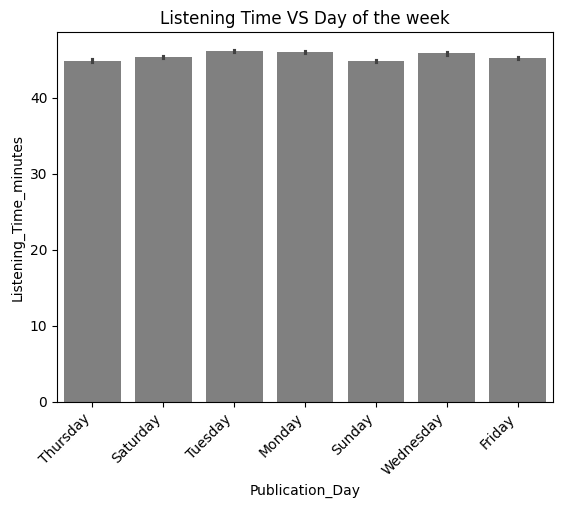

In [251]:
#Listening time compared to the day of the week
sns.barplot(x='Publication_Day', y='Listening_Time_minutes',data=df, estimator='mean', color='grey') 
plt.title('Listening Time VS Day of the week')
plt.xticks(rotation =45, ha = 'right')
plt.show()

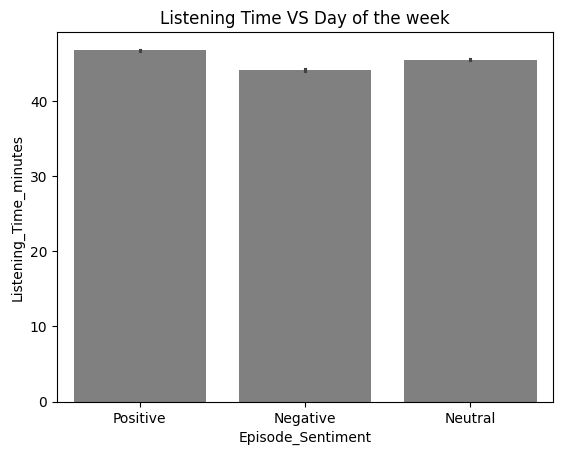

In [252]:
#Listening time compared to episode sentiment
sns.barplot(x='Episode_Sentiment', y='Listening_Time_minutes',data=df,  color='grey') 
plt.title('Listening Time VS Day of the week')
plt.show()

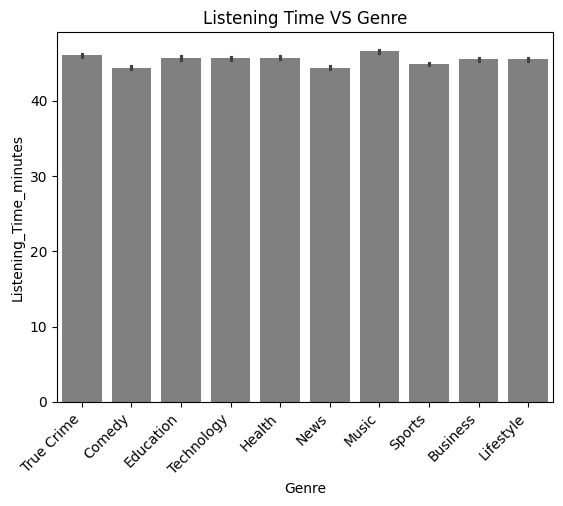

In [253]:
#Listening time compared to the genre
sns.barplot(x='Genre', y='Listening_Time_minutes',data=df, estimator='mean', color='grey') 
plt.title('Listening Time VS Genre')
plt.xticks(rotation =45, ha = 'right')
plt.show()

In [ ]:
#Listening time compared to the time of the day
sns.barplot(x='Publication_Time', y='Listening_Time_minutes',data=df, estimator='mean', color='grey') 
plt.title('Listening Time VS Publication Time')
plt.xticks(rotation =45, ha = 'right')
plt.show()

ValueError: Could not interpret value `Publication_Time` for `x`. An entry with this name does not appear in `data`.

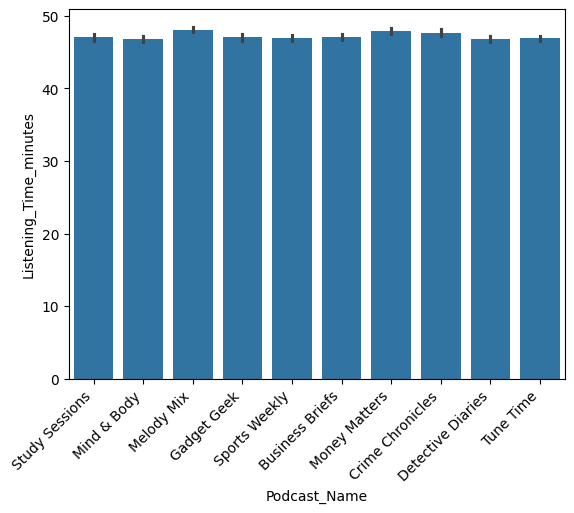

In [ ]:
#Listening time compared to the Pocast
top_makes = df.groupby('Podcast_Name')['Listening_Time_minutes'].mean().nlargest(10).index
sns.barplot(x='Podcast_Name', y='Listening_Time_minutes', data=df[df['Podcast_Name'].isin(top_makes)])
plt.xticks(rotation =45, ha = 'right')
plt.show()

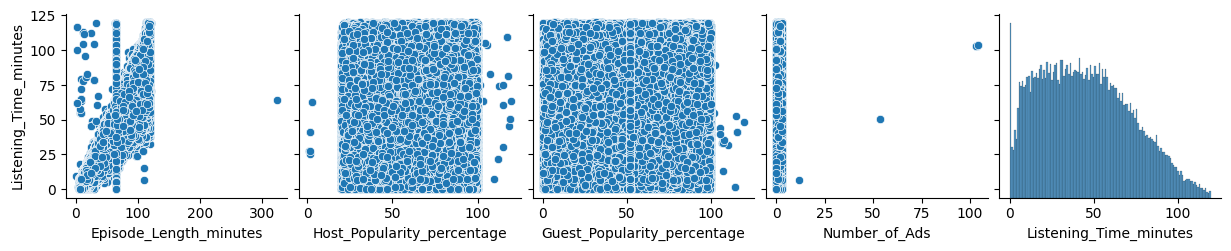

In [256]:
sns.pairplot(df, y_vars='Listening_Time_minutes')

In [257]:
#Removing Outliers
df = df.query('Number_of_Ads <= 5')
df = df.query('Guest_Popularity_percentage <= 100')
df = df.query('Host_Popularity_percentage <= 100 and Host_Popularity_percentage >= 15')
df = df.query('Episode_Length_minutes <= 200')


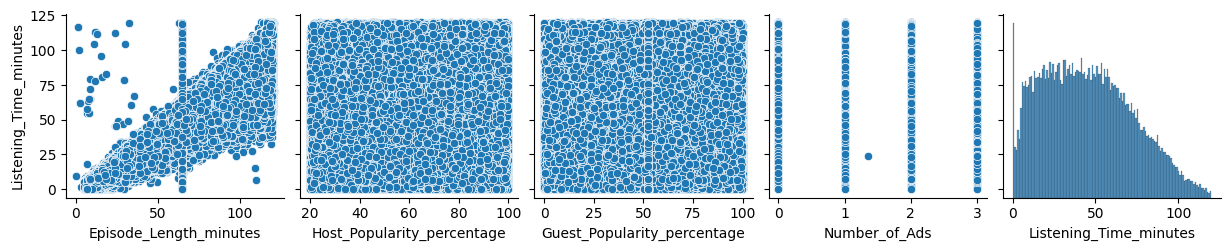

In [258]:
sns.pairplot(df, y_vars='Listening_Time_minutes')

In [259]:
# Looking for the single float value in Number of Ads
df['Number_of_Ads'].apply(float).value_counts()

Number_of_Ads
0.000000    217565
1.000000    214048
3.000000    160173
2.000000    158150
1.348855         1
Name: count, dtype: int64

In [260]:
df = df.query('Number_of_Ads != 1.3 and Number_of_Ads != 1.5')

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 749937 entries, 0 to 749999
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Podcast_Name                 749937 non-null  object 
 1   Episode_Title                749937 non-null  object 
 2   Episode_Length_minutes       749937 non-null  float64
 3   Genre                        749937 non-null  object 
 4   Host_Popularity_percentage   749937 non-null  float64
 5   Publication_Day              749937 non-null  object 
 6   Publication_Time             749937 non-null  object 
 7   Guest_Popularity_percentage  749937 non-null  float64
 8   Number_of_Ads                749937 non-null  float64
 9   Episode_Sentiment            749937 non-null  object 
 10  Listening_Time_minutes       749937 non-null  float64
dtypes: float64(5), object(6)
memory usage: 68.7+ MB


In [262]:
# Dealing with categorical variables
categorical_cols = ['Podcast_Name', 'Episode_Title', 'Genre', 'Publication_Day', 
                    'Publication_Time', 'Episode_Sentiment']

df = df.drop(columns=['Podcast_Name', 'Episode_Title'])


In [263]:
day_mapping = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 
               'Friday': 5, 'Saturday': 6, 'Sunday': 7} 

df['Publication_Day'] = df['Publication_Day'].map(day_mapping)

In [264]:
sentiment_mapping = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
df['Episode_Sentiment'] = df['Episode_Sentiment'].map(sentiment_mapping)

In [265]:
df = pd.get_dummies(df, columns=['Genre', 'Publication_Time'], drop_first=True, dtype=int)

In [266]:
df

,Episode_Length_minutes,Host_Popularity_percentage,Publication_Day,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes,Genre_Comedy,Genre_Education,Genre_Health,Genre_Lifestyle,Genre_Music,Genre_News,Genre_Sports,Genre_Technology,Genre_True Crime,Publication_Time_Evening,Publication_Time_Morning,Publication_Time_Night
0,64.504738,74.81,4,52.236449,0.0,2,31.41998,0,0,0,0,0,0,0,0,1,0,0,1
1,119.800000,66.95,6,75.950000,2.0,0,88.01241,1,0,0,0,0,0,0,0,0,0,0,0
2,73.900000,69.97,2,8.970000,0.0,0,44.92531,0,1,0,0,0,0,0,0,0,1,0,0
3,67.170000,57.22,1,78.700000,2.0,2,46.27824,0,0,0,0,0,0,0,1,0,0,1,0
4,110.510000,80.07,1,58.680000,3.0,1,75.61031,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,75.660000,69.36,6,52.236449,0.0,0,56.87058,0,1,0,0,0,0,0,0,0,0,1,0
749996,75.750000,35.21,6,52.236449,2.0,1,45.46242,0,0,0,0,0,0,0,0,0,0,0,1
749997,30.980000,78.58,4,84.890000,0.0,0,15.26000,0,0,0,1,0,0,0,0,0,0,1,0
749998,108.980000,45.39,4,93.270000,0.0,0,100.72939,0,0,0,1,0,0,0,0,0,0,1,0


In [267]:
X = df.drop('Listening_Time_minutes', axis = 1)
y = df['Listening_Time_minutes']

X = X.to_numpy()
y = y.to_numpy()

In [268]:
reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 749937 entries, 0 to 749999
Data columns (total 19 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Episode_Length_minutes       749937 non-null  float64
 1   Host_Popularity_percentage   749937 non-null  float64
 2   Publication_Day              749937 non-null  int64  
 3   Guest_Popularity_percentage  749937 non-null  float64
 4   Number_of_Ads                749937 non-null  float64
 5   Episode_Sentiment            749937 non-null  int64  
 6   Listening_Time_minutes       749937 non-null  float64
 7   Genre_Comedy                 749937 non-null  int64  
 8   Genre_Education              749937 non-null  int64  
 9   Genre_Health                 749937 non-null  int64  
 10  Genre_Lifestyle              749937 non-null  int64  
 11  Genre_Music                  749937 non-null  int64  
 12  Genre_News                   749937 non-null  int64  
 13  Genr

In [270]:
df_test = pd.read_csv('test.csv')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           250000 non-null  int64  
 1   Podcast_Name                 250000 non-null  object 
 2   Episode_Title                250000 non-null  object 
 3   Episode_Length_minutes       221264 non-null  float64
 4   Genre                        250000 non-null  object 
 5   Host_Popularity_percentage   250000 non-null  float64
 6   Publication_Day              250000 non-null  object 
 7   Publication_Time             250000 non-null  object 
 8   Guest_Popularity_percentage  201168 non-null  float64
 9   Number_of_Ads                250000 non-null  float64
 10  Episode_Sentiment            250000 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 21.0+ MB


In [271]:
df_test.drop(columns=['id', 'Podcast_Name', 'Episode_Title'], axis=1, inplace=True)
df_test['Episode_Length_minutes'].fillna(df_test['Episode_Length_minutes'].mean(), inplace=True)
df_test['Guest_Popularity_percentage'].fillna(df_test['Guest_Popularity_percentage'].mean(), inplace=True)

C:\Users\HAROON TADERS\AppData\Local\Temp\ipykernel_16368\759808945.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Episode_Length_minutes'].fillna(df_test['Episode_Length_minutes'].mean(), inplace=True)
C:\Users\HAROON TADERS\AppData\Local\Temp\ipykernel_16368\759808945.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on 

In [272]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 8 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Episode_Length_minutes       250000 non-null  float64
 1   Genre                        250000 non-null  object 
 2   Host_Popularity_percentage   250000 non-null  float64
 3   Publication_Day              250000 non-null  object 
 4   Publication_Time             250000 non-null  object 
 5   Guest_Popularity_percentage  250000 non-null  float64
 6   Number_of_Ads                250000 non-null  float64
 7   Episode_Sentiment            250000 non-null  object 
dtypes: float64(4), object(4)
memory usage: 15.3+ MB


In [273]:
day_mapping = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 
               'Friday': 5, 'Saturday': 6, 'Sunday': 7} 

df_test['Publication_Day'] = df_test['Publication_Day'].map(day_mapping)

sentiment_mapping = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
df_test['Episode_Sentiment'] = df_test['Episode_Sentiment'].map(sentiment_mapping)

df_test = pd.get_dummies(df_test, columns=['Genre', 'Publication_Time'], drop_first=True, dtype=int)

In [274]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 18 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Episode_Length_minutes       250000 non-null  float64
 1   Host_Popularity_percentage   250000 non-null  float64
 2   Publication_Day              250000 non-null  int64  
 3   Guest_Popularity_percentage  250000 non-null  float64
 4   Number_of_Ads                250000 non-null  float64
 5   Episode_Sentiment            250000 non-null  int64  
 6   Genre_Comedy                 250000 non-null  int64  
 7   Genre_Education              250000 non-null  int64  
 8   Genre_Health                 250000 non-null  int64  
 9   Genre_Lifestyle              250000 non-null  int64  
 10  Genre_Music                  250000 non-null  int64  
 11  Genre_News                   250000 non-null  int64  
 12  Genre_Sports                 250000 non-null  int64  
 13 

In [275]:
test = df_test.to_numpy()

In [295]:
predictions = reg.predict(test)
predictions_df = pd.DataFrame(predictions, columns=['Listening_Time_minutes'])

In [296]:
final_df = predictions_df.reset_index(drop=True)


In [297]:
final_df['id'] = final_df.index + 750000
final_df = final_df[['id', 'Listening_Time_minutes']]

In [299]:
final_df = final_df.to_csv('submission.csv', index=False)